In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import os,sys
sys.path.insert(0,"..")
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import pandas as pd
import dataset_utils
import torchxrayvision as xrv

In [5]:
img = xrv.utils.load_image("../tests/00027426_000.png")

In [6]:
transforms = torchvision.transforms.Compose([xrv.datasets.XRayCenterCrop(),
                                             xrv.datasets.XRayResizer(224)])

In [7]:
img = transforms(img)

In [8]:
ae = xrv.baseline_models.medical_mae.models_mae_cnn.MaskedAutoencoderCNN()

In [9]:
weights = torch.load("/Users/ieee8023/.torchxrayvision/models_data/densenet121_CXR_0.3M_mae.pth", map_location=torch.device('cpu'))

In [10]:
for k in ["optimizer", "epoch", "scaler", "args"]:
    del weights[k]

In [11]:
ae.load_state_dict(weights['model'])

<All keys matched successfully>

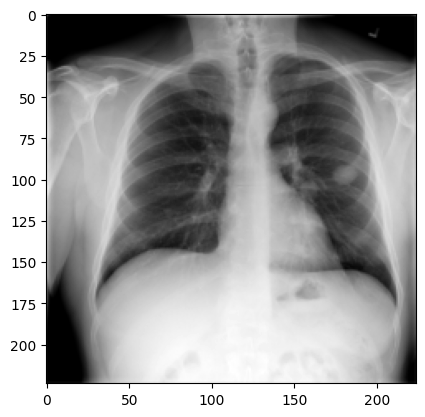

In [12]:
plt.imshow(img[0], cmap="grey")

In [16]:
x = torch.from_numpy(img[None,...]).repeat(1, 3, 1, 1)
# currently between -1024, 1024

x = (x + 1024) / 2048
# now between [0,1] for transforms.Normalize

x = torchvision.transforms.Normalize([0.5056, 0.5056, 0.5056], [0.252, 0.252, 0.252])(x)

x.min(), x.max()

(tensor(-2.0063), tensor(1.7184))

In [17]:
with torch.no_grad():
    o = ae.forward(x, 0)

In [18]:
o[1].min(), o[1].max()

(tensor(-3.3308), tensor(3.9422))

In [19]:
o

(tensor(1.2439),
 tensor([[[[ 0.8480,  0.1172, -0.5470,  ..., -1.5266, -1.7128, -2.1854],
           [-0.1035, -0.3645, -0.6548,  ..., -2.5572, -2.8032, -2.9196],
           [-0.8739, -0.4064,  0.2252,  ..., -2.4911, -2.9597, -3.1294],
           ...,
           [-1.5735, -1.1530, -0.6792,  ..., -2.3673, -2.5828, -2.5903],
           [-1.7591, -1.5852, -1.1831,  ..., -2.4129, -2.5797, -2.5523],
           [-1.5787, -1.5628, -1.2354,  ..., -2.1940, -2.2655, -2.2699]],
 
          [[ 0.9859,  0.2511, -0.4242,  ..., -1.4858, -1.6586, -2.1493],
           [ 0.0356, -0.2367, -0.5342,  ..., -2.5634, -2.8032, -2.9111],
           [-0.7490, -0.2767,  0.3571,  ..., -2.5052, -2.9871, -3.1506],
           ...,
           [-1.4586, -1.0342, -0.5573,  ..., -2.3869, -2.5887, -2.5657],
           [-1.6553, -1.4695, -1.0623,  ..., -2.4223, -2.5701, -2.5040],
           [-1.4952, -1.4518, -1.1132,  ..., -2.1713, -2.2203, -2.2149]],
 
          [[ 1.1781,  0.4631, -0.2103,  ..., -1.3810, -1.5215, -2.017

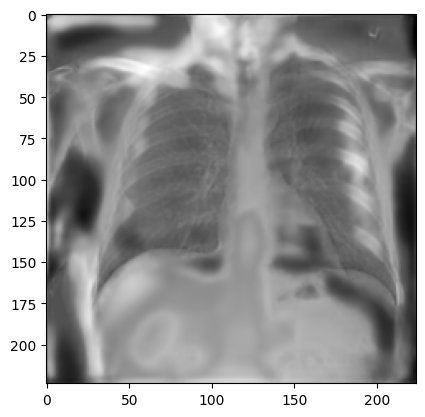

In [20]:
plt.imshow(o[1][0][0], cmap="grey")